# 使用 geopandas 來繪製地圖

    pip install pandas
    pip install geopandas

    or 

    pip3 install pandas
    pip3 install geopandas


安裝 descartes

    conda install -c conda-forge descartes
    or 
    pip install descartes


In [1]:
!pip3 install pandas


You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


# 畫出內建的世界地圖

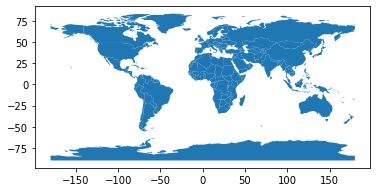

In [6]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot()
plt.show()

# 台灣村里界圖

下載點：
https://data.gov.tw/dataset/7440

In [1]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import os
%matplotlib inline

datapath = os.path.join(os.getcwd(), 'datas', 'geodatas', 'mapdata202003270421', 'VILLAGE_MOI_121_1090324.shp')
#datapath = os.path.join(os.getcwd(), 'datas', 'geodatas', 'gaoxiong.shp')

villages_shp = gp.read_file(datapath) #全台灣村里界圖
villages_shp

#gaoxiong_shp = villages_shp.query('COUNTYNAME=="高雄市"') #高雄市村里界圖
#gaoxiong_shp

ModuleNotFoundError: No module named 'geopandas'

In [2]:


import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import os
%matplotlib inline

datapath = os.path.join(os.getcwd(), 'datas', 'geodatas', 'mapdata202003270421', 'VILLAGE_MOI_121_1090324.shp')

villages_shp = gp.read_file(datapath , encoding="UTF-8") #全台灣村里界圖
gaoxiong_shp = villages_shp.query('COUNTYNAME=="高雄市"') #高雄市村里界圖

gaoxiong_shp['dummy number'] = np.random.ranf(gaoxiong_shp.index.size)
gaoxiong_shp.plot(
    cmap=plt.cm.Blues, #指定顏色
    column='dummy number' #指定從自身的這個 column 讀取顏色深度
)
plt.show()

NameError: name 'gp' is not defined

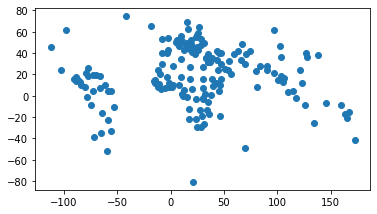

In [3]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# 新增一列，每个国家的中心点
world['centroid_column'] = world.centroid
# 将新增列设置为几何列
world = world.set_geometry('centroid_column') 
world.plot()
plt.show()

# 按照地区人口数量给世界地图着色


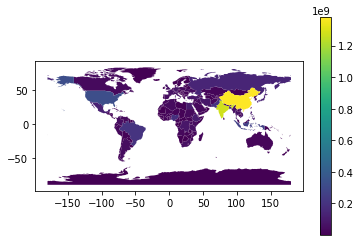

In [4]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1)
world.plot(column= 'pop_est', ax=ax, legend=True)
plt.show()

## 參考資料：

https://zhuanlan.zhihu.com/p/80210579
    
[GeoPandas 畫出生動的色塊地圖](https://mosdeo.github.io/2017/08/10/2017_0810_%E7%94%A8_GeoPandas_%E7%95%AB%E5%87%BA%E7%94%9F%E5%8B%95%E7%9A%84%E8%89%B2%E5%A1%8A%E5%9C%B0%E5%9C%96/)

In [5]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

data = pd.read_csv('china_data.csv', encoding = 'gb18030')#读取人均GDP数据
china_geod = gp.GeoDataFrame.from_file('bou2_4p.shp', encoding = 'gb18030')
china_geod.plot()#查看地图
data_geod = gp.GeoDataFrame(data)#将data转换为Geopandas.DataFrame
china_geod = china_geod.rename(index = str, columns = {'NAME':'prov'})#修改列名
da_merge = china_geod.merge(data_geod, on = 'prov', how = 'left')#数据合并
sum(np.isnan(da_merge['gdpc']))#有54行有空值
da_merge['gdpc'][np.isnan(da_merge['gdpc'])] = 14.0#填充缺失数据
da_merge.plot('gdpc', k = 4, cmap = plt.cm.Greens)#图形初步
da_merge.plot('gdpc', k = 4, cmap = plt.cm.Greens, alpha= 1)
#颜色不够明显，将颜色透明度参数alhpa设置为1
da_merge.plot('gdpc', k = 4, cmap = plt.cm.Greens, scheme = 'percentiles',alpha= 1, figsize = (9, 9), legend = True)#添加图例，设置图形大小
plt.text(x = 76, y = 16, s = u'单位：万元', fontsize = 13)#添加文字
plt.title(u'2015年各省市人均GDP', fontsize=15)#设置图形标题
plt.gca().xaxis.set_major_locator(plt.NullLocator())#去掉x轴刻度
plt.gca().yaxis.set_major_locator(plt.NullLocator())#去年y轴刻度

FileNotFoundError: [Errno 2] No such file or directory: 'china_data.csv'